In [22]:
# load packages 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations 
from scipy import io
from math import factorial
import pandas as pd



In [23]:
your_path = '/Users/veronikasamborska/Desktop/' # change path to where github folder is stored on your machine
# load data (for the main figures we used data after removing variance associated with physical movement)
def import_data(your_path):
    HP = io.loadmat(your_path +'jupyter_notebooks_reviewer3/data/HP_dlc_pca.mat')
    PFC = io.loadmat(your_path + 'jupyter_notebooks_reviewer3/data/PFC_dlc_pca.mat')
    return HP, PFC


In [24]:
def extract_data(data):
    '''This function arranges data in a format used in later SVD analysis - finds A reward, A non-rewarded,
    B reward, B non-rewarded average firing rates for each neuron in 3 tasks 
    split by first and second half of the task for cross-validation'''
    
    all_subjects = data['DM'][0] # trial data
    all_firing = data['Data'][0]  # firing rates
    
    neurons = 0
    for s in all_firing:
        neurons += s.shape[1] # total # of neurons in each region
        

    n_neurons_cum = 0
    inds =  np.arange(13,51) # -500ms before init +500ms and after reward 
    len_trial = len(inds)
    
    # Create matrices to store data from tasks split by first and second half 
    flattened_all_clusters_task_1_first_half =  np.zeros((neurons,len_trial*4))
    flattened_all_clusters_task_1_second_half = np.zeros((neurons,len_trial*4))
    flattened_all_clusters_task_2_first_half = np.zeros((neurons,len_trial*4))
    flattened_all_clusters_task_2_second_half = np.zeros((neurons,len_trial*4))
    flattened_all_clusters_task_3_first_half = np.zeros((neurons,len_trial*4))
    flattened_all_clusters_task_3_second_half = np.zeros((neurons,len_trial*4))
     
    for  s, sess in enumerate(all_firing): #itirate through sessions
            DM = all_subjects[s]
            firing_rates = all_firing[s][:,:,inds]
            n_trials, n_neurons, n_timepoints = firing_rates.shape
            n_neurons_cum += n_neurons 
            
            # extract trial information (reward, task, choice A/B)
            choices = DM[:,1]; reward = DM[:,2]; task =  DM[:,5]; 
            task_1 = np.where(task == 1)[0]; task_2 = np.where(task == 2)[0]; task_3 = np.where(task == 3)[0]
        
            # task indicies of the first/last half
            task_1_1 = task_1[:int(len(task_1)/2)]; task_1_2 = task_1[int(len(task_1)/2):] 
            task_2_1 = task_2[:int(len(task_2)/2)];  task_2_2 = task_2[int(len(task_2)/2):]
            task_3_1 = task_3[:int(len(task_3)/2)];task_3_2 = task_3[int(len(task_3)/2):]
            
            
            # A rewarded and A non-rewared Task 1 First Half
            flattened_all_clusters_task_1_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,:len_trial] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 1))[0],(task_1_1))],0)
            flattened_all_clusters_task_1_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial:len_trial*2] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 1))[0],(task_1_1))],0)
            # B rewarded and B non-rewared Task 1 First Half
            flattened_all_clusters_task_1_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*2:len_trial*3] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 0))[0],(task_1_1))],0)
            flattened_all_clusters_task_1_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*3:len_trial*4] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 0))[0],(task_1_1))],0)

            # A rewarded and A non-rewared Task 1 Second Half
            flattened_all_clusters_task_1_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,:len_trial]  = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 1))[0],(task_1_2))],0)
            flattened_all_clusters_task_1_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial:len_trial*2] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 1))[0],(task_1_2))],0)
            # B rewarded and B non-rewared Task 1 Second Half
            flattened_all_clusters_task_1_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*2:len_trial*3] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 0))[0],(task_1_2))],0)
            flattened_all_clusters_task_1_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*3:len_trial*4] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 0))[0],(task_1_2))],0)
            
            # A rewarded and A non-rewared Task 2 First Half
            flattened_all_clusters_task_2_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,:len_trial] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 1))[0],(task_2_1))],0)
            flattened_all_clusters_task_2_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial:len_trial*2] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 1))[0],(task_2_1))],0)
            # B rewarded and B non-rewared Task 2 First Half
            flattened_all_clusters_task_2_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*2:len_trial*3] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 0))[0],(task_2_1))],0)
            flattened_all_clusters_task_2_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*3:len_trial*4] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 0))[0],(task_2_1))],0)

            # A rewarded and A non-rewared Task 2 Second Half
            flattened_all_clusters_task_2_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,:len_trial]  = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 1))[0],(task_2_2))],0)
            flattened_all_clusters_task_2_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial:len_trial*2] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 1))[0],(task_2_2))],0)
            # B rewarded and B non-rewared Task 2 Second Half
            flattened_all_clusters_task_2_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*2:len_trial*3] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 0))[0],(task_2_2))],0)
            flattened_all_clusters_task_2_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*3:len_trial*4]= np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 0))[0],(task_2_2))],0)
           
            # A rewarded and A non-rewared Task 3 First Half 
            flattened_all_clusters_task_3_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,:len_trial]  = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 1))[0],(task_3_1))],0)
            flattened_all_clusters_task_3_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial:len_trial*2]= np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 1))[0],(task_3_1))],0)
            # B rewarded and B non-rewared Task 3 First Half
            flattened_all_clusters_task_3_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*2:len_trial*3] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 0))[0],(task_3_1))],0)
            flattened_all_clusters_task_3_first_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*3:len_trial*4]= np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 0))[0],(task_3_1))],0)

            # A rewarded and A non-rewared Task 3 Second Half             
            flattened_all_clusters_task_3_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,:len_trial] = np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 1))[0],(task_3_2))],0)
            flattened_all_clusters_task_3_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial:len_trial*2] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 1))[0],(task_3_2))],0)
            # B rewarded and B non-rewared Task 3 Second Half
            flattened_all_clusters_task_3_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*2:len_trial*3]= np.mean(firing_rates[np.intersect1d(np.where((reward==1) & (choices == 0))[0],(task_3_2))],0)
            flattened_all_clusters_task_3_second_half[n_neurons_cum-n_neurons:n_neurons_cum ,len_trial*3:len_trial*4] = np.mean(firing_rates[np.intersect1d(np.where((reward==0) & (choices == 0))[0],(task_3_2))],0)
           
    return flattened_all_clusters_task_1_first_half, flattened_all_clusters_task_1_second_half,\
        flattened_all_clusters_task_2_first_half, flattened_all_clusters_task_2_second_half,\
        flattened_all_clusters_task_3_first_half,flattened_all_clusters_task_3_second_half
   

In [25]:
    
def svd(flattened_all_clusters_task_1_first_half, flattened_all_clusters_task_1_second_half,\
    flattened_all_clusters_task_2_first_half, flattened_all_clusters_task_2_second_half,\
    flattened_all_clusters_task_3_first_half,flattened_all_clusters_task_3_second_half, diagonal = False, axis = 0):

    # Get Us and Vs for Task 1 Second Half
    u_t1_2, s_t1_2, vh_t1_2 = np.linalg.svd(flattened_all_clusters_task_1_second_half, full_matrices = False)   
    # Get Us and Vs for Task 2 Second Half
    u_t2_2, s_t2_2, vh_t2_2 = np.linalg.svd(flattened_all_clusters_task_2_second_half, full_matrices = False)    
    
    t_u_t_1_2 = np.transpose(u_t1_2); t_v_t_1_2 = np.transpose(vh_t1_2) 
    t_u_t_2_2 = np.transpose(u_t2_2); t_v_t_2_2 = np.transpose(vh_t2_2)  
    n_neurons = flattened_all_clusters_task_1_first_half.shape[0]
    
    # Project task 1 first half onto modes from task 1 second half
    s_task_1_2 = np.linalg.multi_dot([t_u_t_1_2, flattened_all_clusters_task_1_first_half, t_v_t_1_2])
    
    if diagonal == False:
        s_1_2 = s_task_1_2.diagonal() # for both cellular and temporal modes look at the diagonal 
    else:
        s_1_2 = np.sum(s_task_1_2**2, axis = axis) # for either cellular and temporal modes look at either 0 or 1 axis
    sum_c_task_1_2 = np.cumsum(abs(s_1_2))/n_neurons #normalise by number of neurons
    
    # Project task 2 first half onto modes from task 1 second half (otherwise same logic)
    s_task_2_1_from_t_1_2 = np.linalg.multi_dot([t_u_t_1_2, flattened_all_clusters_task_2_first_half, t_v_t_1_2])
    if diagonal == False:
        s_2_1_from_t_1_2 = s_task_2_1_from_t_1_2.diagonal()
    else:
        s_2_1_from_t_1_2 = np.sum(s_task_2_1_from_t_1_2**2, axis = axis)
    sum_c_task_2_1_from_t_1_2 = np.cumsum(abs(s_2_1_from_t_1_2))/n_neurons

   
    # Project task 2 first half onto modes from task 2 second half (otherwise same logic)
    s_task_2_1_from_t_2_2 = np.linalg.multi_dot([t_u_t_2_2, flattened_all_clusters_task_2_first_half, t_v_t_2_2])    
    if diagonal == False:
        s_2_1_from_t_2_2 = s_task_2_1_from_t_2_2.diagonal()
    else:
        s_2_1_from_t_2_2 = np.sum(s_task_2_1_from_t_2_2**2, axis = axis)
    sum_c_task_2_1_from_t_2_2 = np.cumsum(abs(s_2_1_from_t_2_2))/n_neurons

    
    # Project task 3 first half onto modes from task 2 second half (otherwise same logic)
    s_task_3_1_from_t_2_2 = np.linalg.multi_dot([t_u_t_2_2, flattened_all_clusters_task_3_first_half, t_v_t_2_2])
    if diagonal == False:
        s_3_1_from_t_2_2 = s_task_3_1_from_t_2_2.diagonal()
    else:
        s_3_1_from_t_2_2 = np.sum(s_task_3_1_from_t_2_2**2, axis = axis)
    sum_c_task_3_1_from_t_2_2 = np.cumsum(abs(s_3_1_from_t_2_2))/n_neurons
    
    #Compare task 3 First Half from Task 1 Last Half 
    s_task_3_1_from_t_1_2 = np.linalg.multi_dot([t_u_t_1_2, flattened_all_clusters_task_3_first_half, t_v_t_1_2])
    if diagonal == False:
        s_3_1_from_t_1_2 = s_task_3_1_from_t_1_2.diagonal()
    else:
        s_3_1_from_t_1_2 = np.sum(s_task_3_1_from_t_1_2**2, axis = axis)
    sum_c_task_3_1_from_t_1_2 = np.cumsum(abs(s_3_1_from_t_1_2))/n_neurons


    average_within_all = np.mean([sum_c_task_1_2, sum_c_task_2_1_from_t_2_2], axis = 0) # average within task projections
    average_between_all = np.mean([sum_c_task_2_1_from_t_1_2, sum_c_task_3_1_from_t_1_2], axis = 0)# average between task projections

    if diagonal == True:
        average_within = average_within_all/average_within_all[-1] # get within task variance explained for cellular OR temporal modes 
        average_between = average_between_all/average_between_all[-1] # get between task variance explained for cellular OR temporal modes 
   
    else: # if taking diagonal for both cellular and temporal modes --> # cumulative weights
        average_within = average_within_all
        average_between = average_between_all
   
    trp = (np.trapz(average_within) - np.trapz(average_between))/average_within.shape[0] # area under the curve
    return trp,average_between,average_within


In [26]:
def real_diff(data, diagonal = False, axis = 0, perm = False, cell = False):
    flattened_all_clusters_task_1_first_half, flattened_all_clusters_task_1_second_half,\
    flattened_all_clusters_task_2_first_half, flattened_all_clusters_task_2_second_half,\
    flattened_all_clusters_task_3_first_half,flattened_all_clusters_task_3_second_half = extract_data(data)
    
    if perm == True and cell == True: # if you want to shuffle cells within each task
        np.random.shuffle(flattened_all_clusters_task_1_first_half)
        np.random.shuffle(flattened_all_clusters_task_2_first_half)  
        np.random.shuffle(flattened_all_clusters_task_3_first_half)  
        
        np.random.shuffle(flattened_all_clusters_task_1_second_half)
        np.random.shuffle(flattened_all_clusters_task_2_second_half)  
        np.random.shuffle(flattened_all_clusters_task_3_second_half) 
  
    elif perm == True and cell == False: # if you want to shuffle time within each task
        np.random.shuffle(flattened_all_clusters_task_1_first_half.T)
        np.random.shuffle(flattened_all_clusters_task_2_first_half.T)  
        np.random.shuffle(flattened_all_clusters_task_3_first_half.T)  
        
        np.random.shuffle(flattened_all_clusters_task_1_second_half.T)
        np.random.shuffle(flattened_all_clusters_task_2_second_half.T)  
        np.random.shuffle(flattened_all_clusters_task_3_second_half.T) 
        
    trp, average_between_all,average_within_all = svd(flattened_all_clusters_task_1_first_half, flattened_all_clusters_task_1_second_half,\
    flattened_all_clusters_task_2_first_half, flattened_all_clusters_task_2_second_half,\
    flattened_all_clusters_task_3_first_half,flattened_all_clusters_task_3_second_half, diagonal = diagonal, axis = axis)
   
    return trp, average_between_all,average_within_all

    

In [27]:
def cell_time_shuffle_vs_real(data, d = True,  axis = 0, shuffle_cells = True, HP_ = 'False'):
    
    # temporal and cellular vectors from real data 
    trp,  between,within =  real_diff(data,  diagonal = d,axis = axis, perm = False, cell = False)
    # temporal and cellular vectors from shuffled data 
    trp_perm,  average_between_all_perm,average_within_all_perm =  real_diff(data, diagonal = d, axis = axis, perm = True, cell = shuffle_cells)
    
    perms_ = np.mean([average_between_all_perm,average_within_all_perm],0)
   
    if d == False:
        perms_norm =  (perms_/within[-1])
        norm_within = within/within[-1]
        norm_between = between/within[-1]
    else:
        perms_norm = perms_/within[-1]
        norm_within = within
        norm_between = between
 
    if HP_ == 'True':
        plt.plot(norm_within, label = 'Within HP', color='black')
        plt.plot(perms_norm, label = 'perm HP', color = 'grey')
        plt.plot(norm_between, label = 'Between HP', color='black',linestyle = '--')
            
    else:
        plt.plot(norm_within, label = 'Within PFC', color='green')
        plt.plot(perms_norm, label = 'perm PFC', color = 'lime')
        plt.plot(norm_between, label = 'Between PFC', color='green',linestyle = '--')
            
    sns.despine()
    plt.legend()
        

Text(0.5, 1.0, 'Temporal Modes')

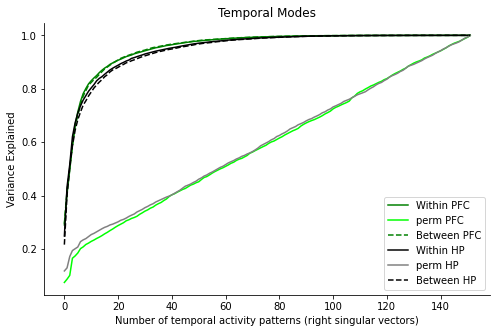

In [28]:
HP,PFC = import_data(your_path)

#Plot temporal modes 
plt.figure(figsize = (8,5))
cell_time_shuffle_vs_real(PFC, d = True, axis = 0,shuffle_cells = False, HP_ = 'False') 
cell_time_shuffle_vs_real(HP, d = True, axis = 0,shuffle_cells = False, HP_ = 'True')
plt.xlabel('Number of temporal activity patterns (right singular vectors)')
plt.ylabel('Variance Explained')
plt.title('Temporal Modes')
  

Text(0.5, 1.0, 'Cellular Modes')

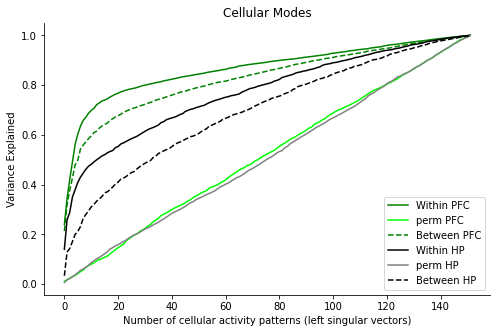

In [29]:
#Plot cellular modes 
plt.figure(figsize = (8,5))
cell_time_shuffle_vs_real(PFC, d = True, axis = 1, shuffle_cells = True, HP_ = 'False')
cell_time_shuffle_vs_real(HP, d = True, axis = 1, shuffle_cells = True, HP_ = 'True')
plt.xlabel('Number of cellular activity patterns (left singular vectors)')
plt.ylabel('Variance Explained')
plt.title('Cellular Modes')
   
   

Text(0.5, 1.0, 'Cellular and Temporal Modes with Temporal Shuffle')

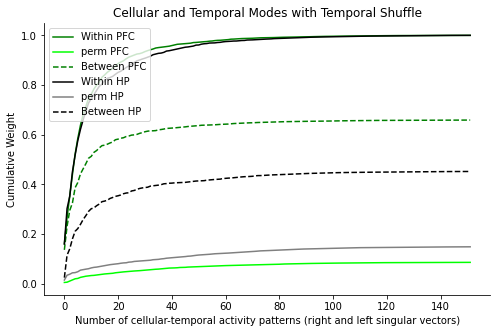

In [30]:
#Plot cellular and temporal modes with a temporal shuffle
plt.figure(figsize = (8,5))
cell_time_shuffle_vs_real(PFC, d = False, shuffle_cells = True, HP_ = 'False')
cell_time_shuffle_vs_real(HP, d = False, shuffle_cells = True, HP_ = 'True')
plt.xlabel('Number of cellular-temporal activity patterns (right and left singular vectors)')
plt.ylabel('Cumulative Weight')
plt.title('Cellular and Temporal Modes with Temporal Shuffle')    
    

Text(0.5, 1.0, 'Cellular and Temporal Modes with Cell Shuffle')

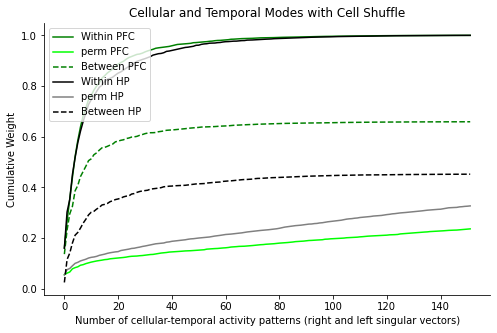

In [31]:
#Plot cellular and temporal modes with a cellular shuffle
plt.figure(figsize = (8,5))
cell_time_shuffle_vs_real(PFC, d = False, shuffle_cells = False, HP_ = 'False')
cell_time_shuffle_vs_real(HP, d = False,  shuffle_cells = False, HP_ = 'True')
plt.xlabel('Number of cellular-temporal activity patterns (right and left singular vectors)')
plt.ylabel('Cumulative Weight')
plt.title('Cellular and Temporal Modes with Cell Shuffle')    
